# Data Visualization  
From a course on  
https://www.coursera.org/learn/python-for-data-visualization/lecture/383TU/line-plots


## Outline  

#### Week 1 - Introduction to Data Visualization Tools
Introduction to Data Visualization  
Introduction to Matplotlib  
Basic Plotting with Matplotlib  
Dataset on Immigration to Canada  
Line Plots  
Lab: Introduction to Matplotlib and Line Plots  
Quiz: Introduction to Data Visualization Tools  

#### Week 2 - Basic and Specialized Visualization Tools
Area Plots  
Histograms  
Bar Charts  
Pie Charts  
Box Plots  
Scatter Plots  
Bubble Plots  
Lab: Basic Visualization Tools  
Lab: Specialized Visualization Tools  
Quiz: Basic Visualization Tools  
Quiz: Specialized Visualization Tools  

#### Week 3 - Advanced Visualizations and Geospatial Data
Waffle Charts  
Word Clouds  
Seaborn and Regression Plots  
Introduction to Folium and Map Styles  
Maps with Markers  
Choropleth Maps  
Lab: Advanced Visualization Tools  
Lab: Creating Maps and Visualizing Geospatial Data  
Quiz: Advanced Visualization Tools  
Quiz: Visualizing Geospatial Data  
Peer-review Assignment  

# <span style="color:blue"> Week 1 </span>

Less is more effective  
Less is more *attractive*  
Less is more `impactive`  

#### Matplotlib consists of   
Backend layer (FigureCanvas, Renderer, Event)  
Artist layer (Artist uses Renderer to draw on the Canvas).  
-- Primitive: Line2D, Rectangle  
-- Composite: Axis, Tick, Figure  
Scripting layer: Made to quickly make pretty plots. pyplot

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd

In [2]:
# Create Pandas dataframe
x= np.arange(1980,2010)
nx = np.size(x)
data={}
for i in range(4):
    country = ['India','USA','Norway','Sweden'][i]
    y = 1000*i + (x-np.min(x))*100 + np.random.uniform(0,1000,nx).astype(np.int32)
    data[country] = y
df_immi = pd.DataFrame(data = data,index=x) ;

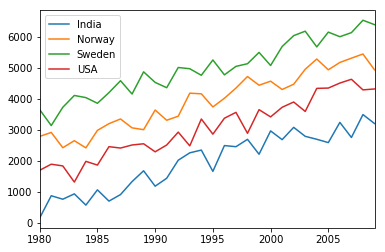

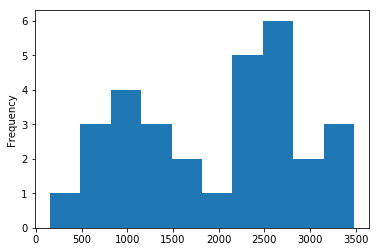

In [3]:
# print(plt.style.available)
# plt.style.use('bmh')

# Can plot directly with pandas dataframes
plt.figure() 
df_immi.plot(kind='line') 
plt.figure() 
df_immi['India'].plot(kind='hist') 

### 1.1 Pandas Basics

In [4]:
# !pip install xlrd
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)
print ('Data read into a pandas dataframe!')


Data read into a pandas dataframe!


In [5]:
# Dataframe manipulation
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can['Total'] = df_can.sum(axis=1,numeric_only=True)
df_can.set_index('Country', inplace=True)
df_can.columns = list(map(str, df_can.columns))   # Set all columns to strings (also 1980 - 2013)


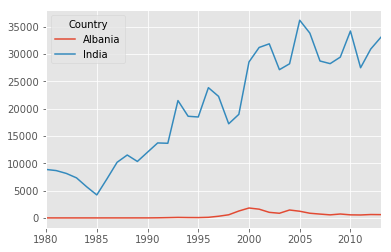

In [10]:
# Quick summary
years = np.arange(1980,2014).astype(np.str).tolist()
years = list(map(str, range(1980, 2014)))
# df_can_num = pd.DataFrame(df_can[years],index=df_can['Country'])
df_can_num = df_can[list(years)].T

df_can_num[['Albania','India']].plot(kind='line')

### 1.2 Line plots

Matplotlib version:  2.0.2


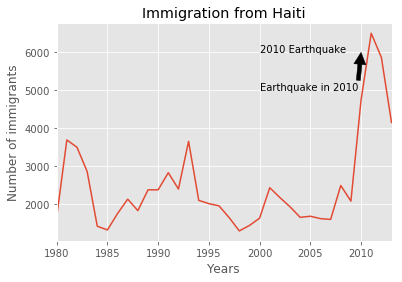

In [16]:
# Check if mplt is loaded
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0
plt.style.use('ggplot')

haiti = df_can.loc['Haiti',years]
haiti.index = haiti.index.map(int) # let's change the index values of Haiti to type integer for plotting

plt.figure()
haiti.plot(kind='line')
plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

# Annotation
plt.text(2000,6000,'2010 Earthquake')
plt.annotate('Earthquake in 2010',xy = (2010,6000),xytext=(2000,5000),arrowprops=dict(color='k'))


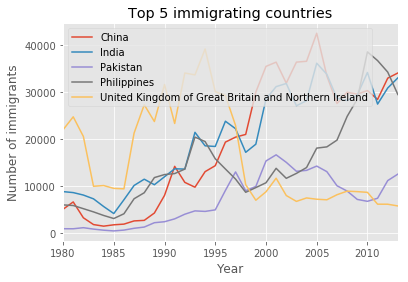

In [17]:
# If have multiple countries to plot
### type your answer here
tot_immi = df_can['Total']
condition = (tot_immi >= np.sort(tot_immi)[-5])
max5_immi = df_can.loc[condition,years].T
max5_immi.plot(kind='line')
plt.legend(loc=0)

plt.xlabel('Year')
plt.ylabel('Number of immigrants')
plt.title('Top 5 immigrating countries')

### 1.3 Other plots

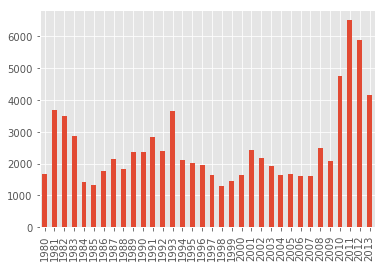

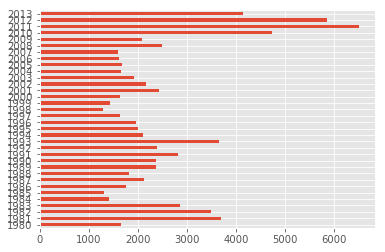

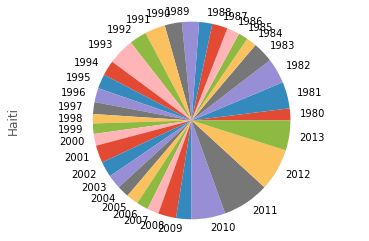

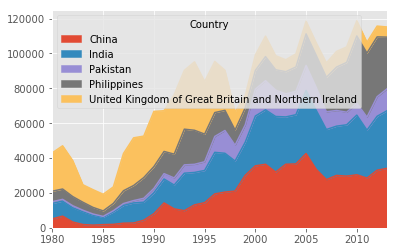

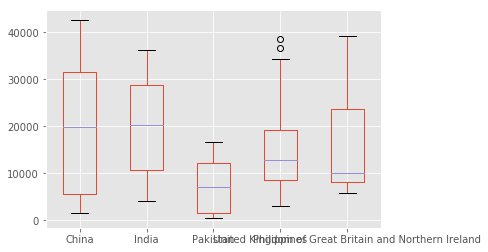

In [42]:
haiti.plot(kind='bar')
plt.figure(); haiti.plot(kind='barh')
plt.figure(); haiti.plot(kind='pie') ; plt.axis('equal')
max5_immi.plot(kind='area')
max5_immi.plot(kind='box')
# max5_immi.plot(kind='hexbin')